In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("../data/processed/card_transdata.csv")


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ... (tu código anterior, incluyendo la carga de datos y la división en entrenamiento y prueba)

# Escalar los datos
scaler = StandardScaler()

# Separar las variables independientes (X) de la variable dependiente (y)
X = data[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']] 
y = data['fraud']


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con los datos escalados y más iteraciones
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

# Asegurarte de que la nueva transacción tenga las mismas características
nueva_transaccion = [[21, 0.27, 6, 1, 0, 0, 1]]  # Agrega los valores faltantes si es necesario
probabilidad_fraude = model.predict_proba(scaler.transform(nueva_transaccion))[0][1]
print("Probabilidad de fraude:", probabilidad_fraude)

Probabilidad de fraude: 0.7622120563684907


/home/juan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


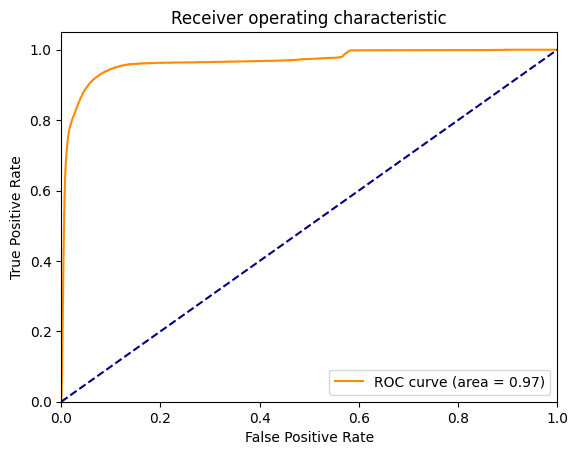

Matriz de confusión:
[[181283   1274]
 [  6976  10467]]


In [17]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Calcular la probabilidad de pertenecer a la clase positiva
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Matriz de confusión
y_pred = model.predict(X_test_scaled)
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Importancia de las características (para modelos basados en árboles)
# Si estás utilizando un modelo basado en árboles (como Random Forest), puedes acceder a la importancia de las características de la siguiente manera:
# importances = model.feature_importances_
# ... (visualizar la importancia de las características)


In [18]:
TN, FP, FN, TP = conf_matrix.ravel()

# Calculamos las métricas
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# Imprimimos los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1-score:", f1_score)

Accuracy: 0.95875
Precision: 0.8914913550804872
Recall: 0.6000687955053603
Specificity: 0.9930213577129335
F1-score: 0.7173108552631579


## AHHORA EXPORTAMOS EL MODELO PARA PODER UTILIZARLO POSTERIORMENTE


In [8]:
import joblib

# Guardar el modelo
#joblib.dump(model, 'modelo_prediccion_fraude_credito.joblib')

# Cargar el modelo
#loaded_model = joblib.load('mi_modelo.joblib')

joblib.dump(scaler, 'scaler_fraude_credito.joblib')


['scaler_fraude_credito.joblib']